In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import generate_mu_z
from astroML.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

C:\Users\leoni\anaconda3\Lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


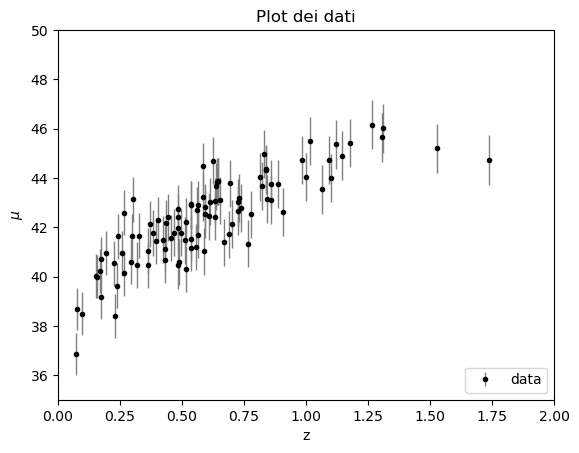

In [2]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title("Plot dei dati")
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

In [7]:
model = LinearRegression()
model.fit(z_sample[:, np.newaxis], mu_sample, dmu)

LinearRegression()

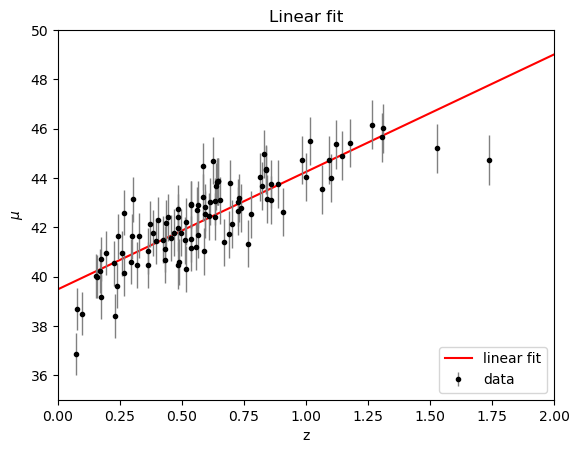

In [8]:
z=np.linspace(0, 2, 1000)
linear_fit=model.predict(z[:, np.newaxis])

plt.plot(z, linear_fit, color='red', label="linear fit")
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title("Linear fit")
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

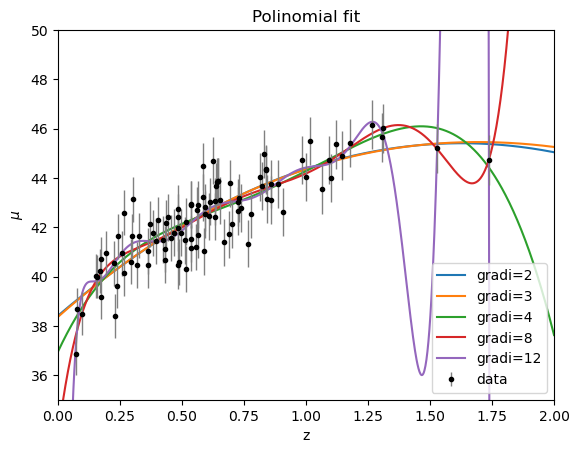

In [9]:
degree=[2,3,4,8,12]

for d in (degree):
    model2 = PolynomialRegression(d) 
    model2.fit(z_sample[:, np.newaxis], mu_sample, dmu)

    mu_pred2 = model2.predict(z[:, np.newaxis])
    plt.plot(z, mu_pred2,label='gradi='+str(d))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title("Polinomial fit")
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

#probabilmente fit migliore è 3 o 4, 8 già overfit 

In [10]:
data = np.vstack((z_sample, mu_sample, dmu)).T

train_data, test_data = train_test_split(data, train_size=0.7, random_state=42)

ztrain, mu_train, dmu_train = train_data.T
ztest, mu_test, dmu_test = test_data.T

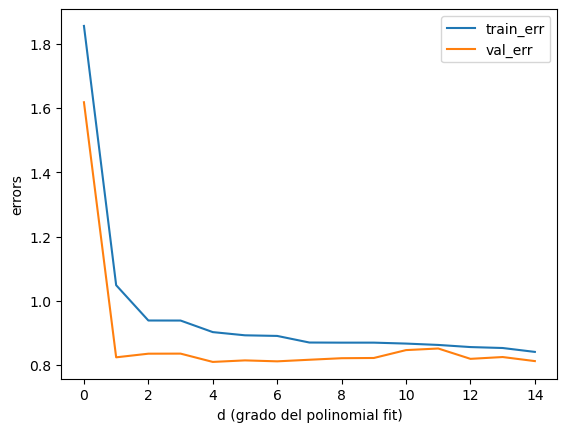

Grado polinomio migliore 4
errore validation per polinomio di grado 4:  0.8095703348999923


In [11]:
deg=np.arange(0,15)

train_err=[]
validation_err=[] 
for d in range (len(deg)):
    model = PolynomialRegression(d) 
    model.fit(ztrain[:, np.newaxis], mu_train, dmu_train)
    mu_pred = model.predict(ztrain[:, np.newaxis])
    
    train_err=np.append(train_err, np.sqrt(np.sum((mu_train-mu_pred)**2)/len(ztrain) ))
    
    mu_pred1 = model.predict(ztest[:, np.newaxis])
    validation_err=np.append(validation_err, np.sqrt(np.sum((mu_test-mu_pred1)**2)/len(ztest) ))
    
plt.plot(deg, train_err, label="train_err")
plt.plot(deg, validation_err, label="val_err")
plt.legend()
plt.xlabel("d (grado del polinomial fit)")
plt.ylabel("errors")
plt.show()

min_index = np.argmin(validation_err)
d_min = deg[min_index]
print("Grado polinomio migliore", d_min)
val_err07=validation_err[min_index]  #errore associato al polinomio di grado 4
print("errore validation per polinomio di grado 4: ", val_err07)

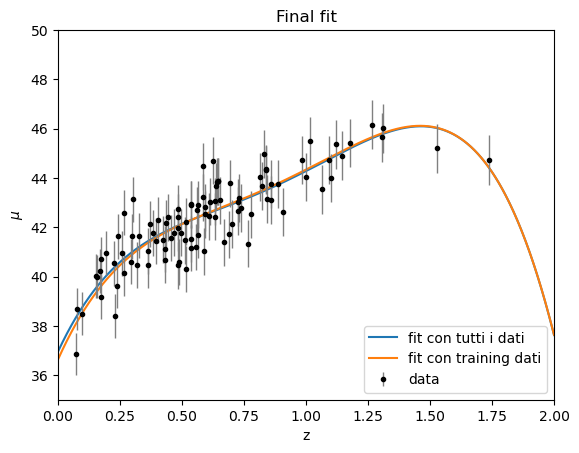

In [12]:
model = PolynomialRegression(d_min) 
model.fit(z_sample[:, np.newaxis], mu_sample, dmu)

mu_pred = model.predict(z[:, np.newaxis])
plt.plot(z, mu_pred,label='fit con tutti i dati')

model.fit(ztrain[:, np.newaxis], mu_train, dmu_train)

mu_pred = model.predict(z[:, np.newaxis])
plt.plot(z, mu_pred,label='fit con training dati')
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title("Final fit")
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

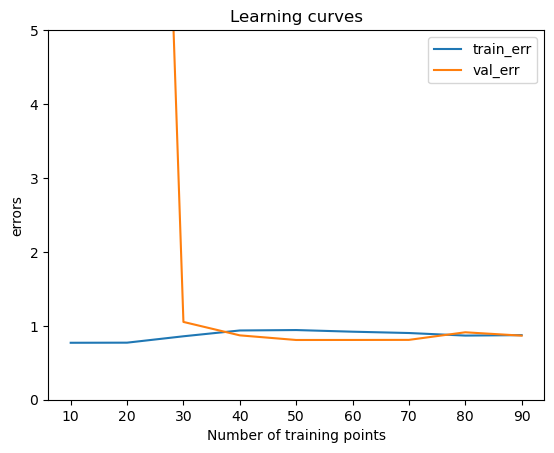

validation error con train-split=0.4 0.8707406261640158


In [13]:
#faccio learning curves così vedo come dividere train/validation set

data = np.vstack((z_sample, mu_sample, dmu)).T

train_err=[]
validation_err=[]
train_division=np.arange(0.1, 1.0, 0.1)
for t in (train_division):
    train_data, test_data = train_test_split(data, train_size=t, random_state=42)

    ztrain, mu_train, dmu_train = train_data.T
    ztest, mu_test, dmu_test = test_data.T

    model = PolynomialRegression(d_min) 
    model.fit(ztrain[:, np.newaxis], mu_train, dmu_train)
    mu_pred = model.predict(ztrain[:, np.newaxis])
    
    train_err=np.append(train_err, np.sqrt(np.sum((mu_train-mu_pred)**2)/len(ztrain) ))
    
    mu_pred1 = model.predict(ztest[:, np.newaxis])
    validation_err=np.append(validation_err, np.sqrt(np.sum((mu_test-mu_pred1)**2)/len(ztest) ))

train_samples=len(z_sample)*train_division

plt.plot(train_samples, train_err, label="train_err")
plt.plot(train_samples, validation_err, label="val_err")
plt.legend()
plt.xlabel("Number of training points")
plt.ylabel("errors")

plt.title("Learning curves")
plt.ylim(0,5)
plt.show()

val_err04=validation_err[3]
print("validation error con train-split=0.4", val_err04)
#vedo che mi basta avere 40 punti per fare training

In [14]:
print("Fissato pol grado 4, validation error con train_split=0.7:", val_err07 )
print("Fissato pol grado 4, validation error con train_split=0.4:", val_err04 )
print("differenza tra errori:", np.abs(val_err04-val_err07))

Fissato pol grado 4, validation error con train_split=0.7: 0.8095703348999923
Fissato pol grado 4, validation error con train_split=0.4: 0.8707406261640158
differenza tra errori: 0.06117029126402351


### BASIS FUNCTION REGRESSION

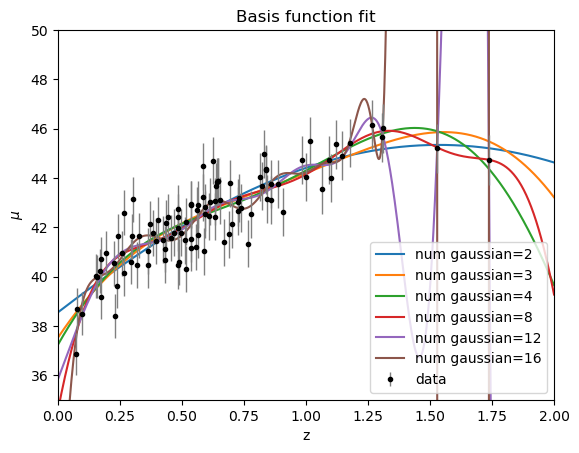

In [15]:
from astroML.linear_model import BasisFunctionRegression

mu=[2, 3, 4, 8, 12, 16]  

for n in (mu):
    mu_grid=np.linspace(0,2, n)[:, np.newaxis]

    sigma_test = 1*(mu_grid[1]- mu_grid[0]) 
    
    model = BasisFunctionRegression('gaussian', mu=mu_grid, sigma=sigma_test)  
    model.fit(z_sample[:, np.newaxis], mu_sample, dmu)

    mu_pred_gauss=model.predict(z[:, np.newaxis])
    plt.plot(z, mu_pred_gauss, label='num gaussian='+str(n))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title("Basis function fit")
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

In [16]:
data = np.vstack((z_sample, mu_sample, dmu)).T

train_data, test_data = train_test_split(data, train_size=0.7, random_state=42)

ztrain, mu_train, dmu_train = train_data.T
ztest, mu_test, dmu_test = test_data.T

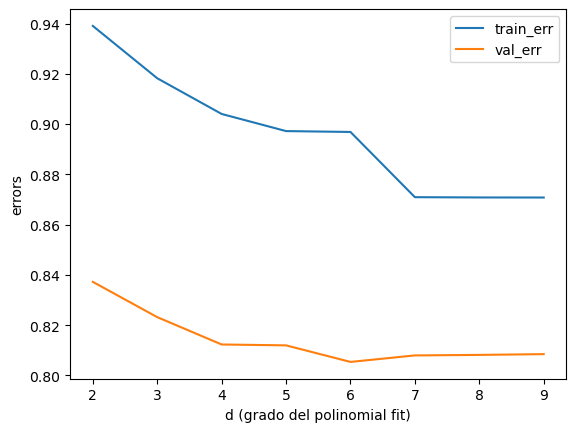

Numero ottimale di gaussiane 6


In [17]:
train_err=[]
validation_err=[]
mu=np.arange(2,10)
for n in (mu):
    mu_grid=np.linspace(0,2, n)[:, np.newaxis]

    sigma_test = 1*(mu_grid[1]- mu_grid[0])
    
    model = BasisFunctionRegression('gaussian', mu=mu_grid, sigma=sigma_test)
    model.fit(ztrain[:, np.newaxis], mu_train, dmu_train)
    mu_pred = model.predict(ztrain[:, np.newaxis])
    
    train_err=np.append(train_err, np.sqrt(np.sum((mu_train-mu_pred)**2)/len(ztrain) ))
    
    mu_pred1 = model.predict(ztest[:, np.newaxis])
    validation_err=np.append(validation_err, np.sqrt(np.sum((mu_test-mu_pred1)**2)/len(ztest) ))
    
plt.plot(mu, train_err, label="train_err")
plt.plot(mu, validation_err, label="val_err")
plt.legend()
plt.xlabel("d (grado del polinomial fit)")
plt.ylabel("errors")

plt.show()

min_index = np.argmin(validation_err)
mu_best = mu[min_index]
print("Numero ottimale di gaussiane", mu_best)


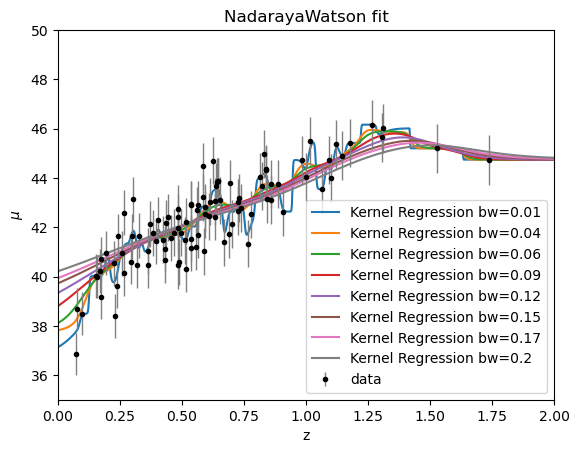

In [18]:
from astroML.linear_model import NadarayaWatson

for bw in np.round(np.linspace(0.01,0.2,8),2):

    regressor = NadarayaWatson('gaussian', bw)

    regressor.fit(z_sample[:,np.newaxis], mu_sample) 
    mu_fit = regressor.predict(z[:,np.newaxis])
   
    mu_fit = regressor.predict(z[:,np.newaxis])
    plt.plot(z, mu_fit,label='Kernel Regression bw='+str(bw))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title("NadarayaWatson fit")
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

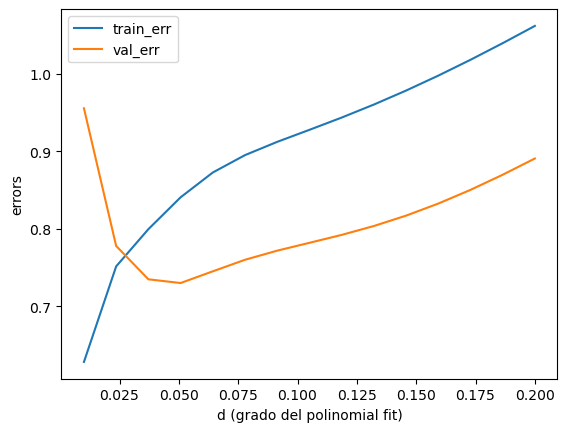

Valore ottimale della bandwidth 0.05071428571428572


In [33]:
bw=np.linspace(0.01,0.2,15)

train_err=[]
validation_err=[]
for b in (bw):
    
    model = NadarayaWatson('gaussian', b)
    model.fit(ztrain[:, np.newaxis], mu_train, dmu_train)
    mu_pred = model.predict(ztrain[:, np.newaxis])
    
    train_err=np.append(train_err, np.sqrt(np.sum((mu_train-mu_pred)**2)/len(ztrain) ))
    
    mu_pred1 = model.predict(ztest[:, np.newaxis])
    validation_err=np.append(validation_err, np.sqrt(np.sum((mu_test-mu_pred1)**2)/len(ztest) ))
    
plt.plot(bw, train_err, label="train_err")
plt.plot(bw, validation_err, label="val_err")
plt.legend()
plt.xlabel("d (grado del polinomial fit)")
plt.ylabel("errors")

plt.show()

min_index = np.argmin(validation_err)
bw_best = bw[min_index]
print("Valore ottimale della bandwidth", bw_best)
    